In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns', None) 
df = pd.read_csv("../zoopla/DFnew.csv")


In [ ]:
#Evaluate performance of models function
def evaluate_model(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return r2, rmse

In [9]:
X.head()


,num_bedrooms,num_bathrooms,num_recepts,latitude,longitude,property_type_Bungalow,property_type_Detached bungalow,property_type_Detached house,property_type_Flat,property_type_Maisonette,property_type_Terraced house,Off street parking,Driveway,Conservatory,Garage,Dining Room,Swimming pool,nearest_main_bua,end_date_numeric,pcu_lad,lat_long,lad22cdLog,pcuLog,hospitals_supermarketsLog,schoolsLog,nearest_parksLog,gp_practices_30Log,hospitals_30Log,primary_schools_30Log,secondary_schools_30Log,supermarkets_30Log
3723733,0.172971,1.246569,-0.804043,1.126278,-0.866607,0,0,0,0,0,1,0,0,0,0,0,0,-0.752497,0.320813,-0.568944,-0.906858,-0.721889,-0.346709,-0.796253,0.564846,-1.136057,1.000643,-0.539275,0.598230,0.391209,0.294717
3865926,-0.828706,-0.513084,-0.804043,0.415544,1.935793,0,1,0,0,0,0,0,0,0,0,0,0,-0.251819,0.270019,-0.324764,1.955828,0.073413,-0.250142,-0.796253,-1.325440,1.293159,-1.205563,-0.539275,-0.456025,-0.864835,-0.661411
1305380,-0.828706,-0.513084,-0.804043,1.418120,-0.434135,0,0,0,0,0,1,0,0,0,0,0,0,-0.213305,-1.539273,-0.683538,-0.470833,-0.820304,-0.867328,-0.796253,0.789233,0.334948,0.631279,-0.539275,0.753991,0.720116,0.785155
4965593,-1.830383,-0.513084,-0.804043,-0.872237,0.221067,0,0,0,1,0,0,0,0,0,0,0,0,1.173187,0.105445,0.236881,0.238705,1.065774,0.071327,-0.796253,-1.325440,-1.136057,-1.205563,-0.539275,-0.456025,-0.864835,-1.384694
5044174,0.172971,-0.513084,0.737246,-0.180917,2.004971,0,1,0,0,0,0,0,0,0,1,1,0,1.981975,0.022143,-0.083454,2.011544,-0.117110,0.676207,-0.796253,-1.325440,-1.136057,-1.205563,-0.539275,-1.914784,-0.864835,-1.384694


In [ ]:
# TRAINING LINEAR REGRESSION MODEL
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import uniform
from sklearn.preprocessing import StandardScaler
import numpy as np

y = df['price_lastLog']
X = df.drop(columns=['price_lastLog']) 

# Standardise the data
noStandardise = [
'property_type_Bungalow', 'property_type_Detached bungalow', 'property_type_Detached house',
'property_type_Flat', 'property_type_Maisonette', 'property_type_Terraced house',
'Off street parking', 'Driveway', 'Conservatory', 'Garage', 'Dining Room', 'Swimming pool'
]
columns_to_standardise = [col for col in X.columns if col not in noStandardise]
scaler = StandardScaler()
X[columns_to_standardise] = scaler.fit_transform(X[columns_to_standardise])


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train_actual = np.exp(y_train)
y_test_actual = np.exp(y_test)

# Train the linear regression model
linear = LinearRegression()
linear.fit(X_train, y_train)
linear_pred_tr = linear.predict(X_train)
linear_pred_te= linear.predict(X_test)
linear_pred_tr_actual = np.exp(linear_pred_tr)
linear_pred_te_actual = np.exp(linear_pred_te)

train_r2_linear, train_rmse_linearLog = evaluate_model(y_train, linear_pred_tr)
test_r2_linear, test_rmse_linearLog = evaluate_model(y_test, linear_pred_te)
print("Linear Regression - Train RMSE logged:", train_rmse_linearLog)
print("Linear Regression - Test RMSE logged:", test_rmse_linearLog)
print("Linear Regression - Train R²:", train_r2_linear)
print("Linear Regression - Test R²:", test_r2_linear)


print(linear.coef_)
print(linear.intercept_)  

Linear Regression - Train RMSE logged: 0.24278903273797872
Linear Regression - Test RMSE logged: 0.24255603799426745
Linear Regression - Train R²: 0.8582162843927355
Linear Regression - Test R²: 0.8582720640816188
[ 0.15241332  0.04266624  0.03465351  0.00098752 -0.04068745  0.00865031
  0.09307836  0.10202135  0.0020971  -0.03073575 -0.08787868 -0.07858238
 -0.01334597 -0.00344972  0.00665574  0.03843084  0.00682812  0.12619951
  0.01086048  0.00866166 -0.01870551  0.01920448  0.02118414  0.00176499
 -0.00080258  0.14615844  0.3525497   0.08464105]
12.473277047284583


In [ ]:
# Coefficients for linear model
from sklearn.linear_model import LogisticRegression
coefficients = pd.Series(abs(linear.coef_), index=X.columns)
coefficients.sort_values(ascending=False, inplace=True) 
print(coefficients)

smoothed_pcuLog                    0.352550
num_bedrooms                       0.152413
smoothed_lad22cdLog                0.146158
Swimming pool                      0.126200
property_type_Detached bungalow    0.102021
property_type_Bungalow             0.093078
property_type_Maisonette           0.087879
end_date_numeric                   0.084641
property_type_Terraced house       0.078582
num_bathrooms                      0.042666
latitude                           0.040687
Garage                             0.038431
num_recepts                        0.034654
property_type_Flat                 0.030736
supermarkets_30                    0.021184
secondary_schools_30               0.019204
primary_schools_30                 0.018706
Off street parking                 0.013346
gp_practices_30                    0.010860
hospitals_30                       0.008662
longitude                          0.008650
Dining Room                        0.006828
Conservatory                    

In [ ]:
#Ridge Regression
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha':[ 2.75, 2.0, 2,3,4]}
ridge_cv = GridSearchCV(ridge,param_grid, cv=5)
ridge_cv.fit(X_train, y_train)
ridge_cv_pred_tr = ridge_cv.predict(X_train)
ridge_cv_pred_te = ridge_cv.predict(X_test)
train_r2_ridge_cv, train_rmse_ridge_cv = evaluate_model(y_train, ridge_cv_pred_tr)
test_r2_ridge_cv, test_rmse_ridge_cv = evaluate_model(y_test, ridge_cv_pred_te)
print("RidgeCV - Train RMSE logged:", train_rmse_ridge_cv)
print("RidgeCV - Test RMSE logged:", test_rmse_ridge_cv)
print("RidgeCV - Train R²:", train_r2_ridge_cv)
print("RidgeCV - Test R²:", test_r2_ridge_cv)


RidgeCV - Train RMSE logged: 0.24278903273939276
RidgeCV - Test RMSE logged: 0.24255603861642594
RidgeCV - Train R²: 0.8582162843910839
RidgeCV - Test R²: 0.858272063354552


In [ ]:

# Train and evaluate LassoCV
lasso_cv = LassoCV(alphas=np.logspace(-6, 1, 50), cv=15, random_state=42)
lasso_cv.fit(X_train, y_train)

lasso_pred_tr = lasso_cv.predict(X_train)
lasso_pred_te = lasso_cv.predict(X_test)
lasso_pred_tr_actual = np.exp(lasso_pred_tr)
lasso_pred_te_actual = np.exp(lasso_pred_te)

lasso_r2_train, lasso_rmse_train = evaluate_model(y_train, lasso_pred_tr)
lasso_r2_test, lasso_rmse_test = evaluate_model(y_test, lasso_pred_te)

print("Best alpha for Lasso:", lasso_cv.best_estimator_)
print("Lasso - Train RMSE (Logged):", lasso_rmse_train)
print("Lasso - Test RMSE (Logged):", lasso_rmse_test)
print("Lasso - Train R²:", lasso_r2_train)
print("Lasso - Test R²:", lasso_r2_test)
print(lasso_cv.coef_)
print(lasso_cv.intercept_)



In [ ]:
#Linear Support Vector Refgression
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVR
from scipy.stats import uniform, randint, loguniform
df = pd.read_csv("../zoopla/finals/DFlogged.csv")


y = df['price_lastLog']
X = df.drop(columns=['price_lastLog'])
noStandardise = [
'property_type_Bungalow', 'property_type_Detached bungalow', 'property_type_Detached house',
'property_type_Flat', 'property_type_Maisonette', 'property_type_Terraced house',
'Off street parking', 'Driveway', 'Conservatory', 'Garage', 'Dining Room', 'Swimming pool'
]

columns_to_standardise = [col for col in X.columns if col not in noStandardise]

scaler = StandardScaler()
X[columns_to_standardise] = scaler.fit_transform(X[columns_to_standardise])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
linear_svr = LinearSVR(max_iter=10000, random_state=42)

# Fit on training data
linear_svr.fit(X_train, y_train)
# Best model
best_model = linear_svr.best_estimator_

# Evaluate
y_pred = best_model.predict(X_test)
r2, rmse = evaluate_model(y_test, y_pred)

print("Best Params:", linear_svr.best_params_)
print("Test R²:", r2)
print("Test RMSE:", rmse)



In [ ]:
#TRAINING RANDOM FOREST 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import os 
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from scipy.stats import uniform, randint, loguniform


def evaluate_model(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return r2, rmse

df = pd.read_csv('DF_finalLogged.csv')
df = df.sample(frac=0.5, random_state=42)

y = df['price_lastLog']
X = df.drop(columns=['price_lastLog'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define model
rf = RandomForestRegressor(random_state=42, verbose = 1)
# Define parameter grid
param_dist = {
    'n_estimators': randint(250, 300),    
    'max_depth': randint(25, 40),           
    'min_samples_split': randint(2, 6),  
    'min_samples_leaf': randint(1, 6),   
    'max_samples': uniform(0.5, 0.5),
    'bootstrap': [True]                 
}

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=5,           
    cv=5,                 
    verbose=2,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=int(os.environ.get('NSLOTS', 1))
)

# Fit on training data
random_search.fit(X_train, y_train)
print("Best Parameters:", random_search.best_params_)

y_pred = random_search.predict(X_test)
r2,rmse = evaluate_model(y_test,y_pred)

print(f"Test R²: {r2}")
print(f"Test RMSE: {rmse}")
import joblib
best_model = random_search.best_estimator_
# Save model with compression
joblib.dump(best_model, 'best_rf_model6.joblib')

In [ ]:
#TRAINING XGBoost model
import pandas as pd
import os
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVR
from xgboost import XGBRegressor 
from scipy.stats import uniform, randint, loguniform
import joblib
df = pd.read_csv("DF_finalLogged.csv")
y = df['price_lastLog']
X = df.drop(columns=['price_lastLog'])

# Standardise the data
noStandardise = [
'property_type_Bungalow', 'property_type_Detached bungalow', 'property_type_Detached house',
'property_type_Flat', 'property_type_Maisonette', 'property_type_Terraced house',
'Off street parking', 'Driveway', 'Conservatory', 'Garage', 'Dining Room', 'Swimming pool'
]

columns_to_standardise = [col for col in X.columns if col not in noStandardise]

scaler = StandardScaler()
X[columns_to_standardise] = scaler.fit_transform(X[columns_to_standardise])
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgbr = XGBRegressor(objective='reg:squarederror', eval_metric='rmse', random_state=42, tree_method='gpu_hist',)

params = {
    'learning_rate': uniform(0.01,0.3),
    'n_estimators':[400,500,600],
    'min_child_weight':[7,8,9,10,11,12,13,14,15], 
    'gamma':[0.3,0.4,0.5,0.6,0.7,0.8],  
    'subsample':[0.6,0.7,0.8,0.9,1],
    'colsample_bytree':[0.6,0.7,0.8,0.9,1],
    'max_depth':  randint(8, 25),
}

RCV = RandomizedSearchCV(
    estimator=xgbr,
    param_distributions=params,
    n_iter=50,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=int(os.environ.get('NSLOTS', 1))
)
RCV.fit(X_train, y_train)
print("Best parameters found: ", RCV.best_params_)
best_model = RCV.best_estimator_
xgbr_pred_tr = best_model.predict(X_train)
xgbr_pred_te = best_model.predict(X_test)
train_r2_xgbr, train_rmse_xgbr = evaluate_model(y_train, xgbr_pred_tr)
test_r2_xgbr, test_rmse_xgbr = evaluate_model(y_test, xgbr_pred_te) 
print("XGBoost - Train RMSE (Logged):", train_rmse_xgbr)
print("XGBoost - Test RMSE (Logged):", test_rmse_xgbr)
print("XGBoost - Test R²:", test_r2_xgbr)

# Save the trained model and scaler
joblib.dump(scaler, 'scaler.pkl')
best_model.save_model('xgboost_model4.json')

Test R²: 0.9318837408741463
Test RMSLE: 0.16815686398607024


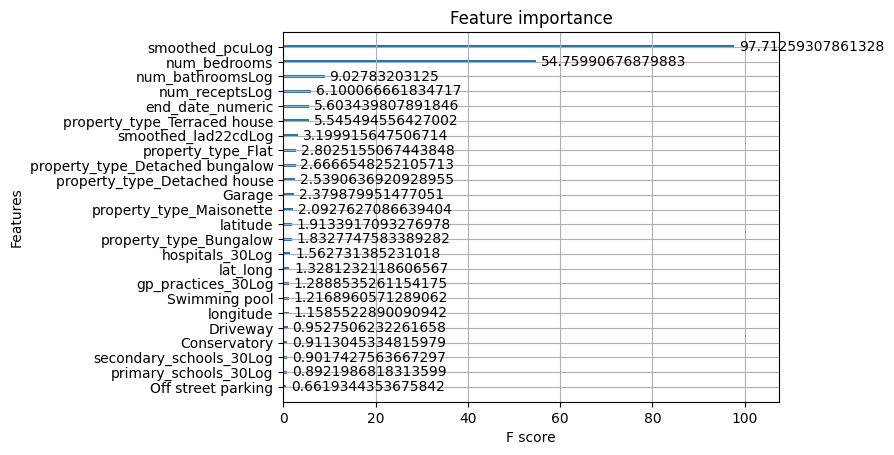

In [ ]:
#Load XGboost model on modified dataset
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
model2 = xgb.XGBRegressor()

# model2.load_model("../models/xgboost_ls_model.json")
# model2.load_model("../models/xgboost_model.json")
model2.load_model("../models/xgboost__more_smoothed_ls_model.json")  


# Get feature importances and plot 
importances = model2.get_booster().get_score(importance_type='weight')

xgb.plot_importance(model2, importance_type='gain')

df = pd.read_csv("../zoopla/finals/DF.csv")
y = df['price_lastLog']
X = df.drop(columns=['price_lastLog','nearest_parksLog','nearest_main_bua','Dining Room','supermarkets_30Log'])

X['lat_long']=X['latitude']*X['longitude']

noStandardise = [
'property_type_Bungalow', 'property_type_Detached bungalow', 'property_type_Detached house',
'property_type_Flat', 'property_type_Maisonette', 'property_type_Terraced house',
'Off street parking', 'Driveway', 'Conservatory', 'Garage', 'Dining Room', 'Swimming pool'
]

columns_to_standardise = [col for col in X.columns if col not in noStandardise]

scaler = StandardScaler()
X[columns_to_standardise] = scaler.fit_transform(X[columns_to_standardise])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Make predictions on the test set
y_pred = model2.predict(X_test)
r2_test, rmsle_test = evaluate_model(y_test, y_pred)

# Print the results
print(f"Test R²: {r2_test}")
print(f"Test RMSLE: {rmsle_test}")
